<a href="https://colab.research.google.com/github/rashadkp/Image_Processing/blob/master/Filter_design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np

Kernel Matrix Function

In [ ]:
def kernel(filter,n):
  #mean kernel for size N*N
  if(filter=='Mean'):
    mean=np.ones((n,n))
    return mean/(n*n)
  #median mask making of size n*n simple 1 in all element beacuse kernel working depend on image element
  elif(filter=='Median'):
    median=np.ones((n,n))
    return median
  # Prewitt kernel for horizontal and vertical
  elif(filter=='Laplacian'):
    laplacian=np.ones((n,n))
    x=np.sum(laplacian)-1
    laplacian[int(n/2)][int(n/2)]=-x
    return laplacian
  elif(filter=='Prewit'):
    Prewitt=np.zeros((n,n))
    for i in range(int(n/2)):
     for j in range(n) :
      Prewitt[int(j)][int(i)]=-((int(n/2))-i)
      Prewitt[int(j)][(i+((int(n/2))+1))]=i+1
    return Prewitt
  elif(filter=='Sobel_Kernels_horiz'):#horizontal shobel kernel mask
    Sobel_Kernels=np.zeros((n,n))
    for i in range(int(n/2)):
     for j in range(n) :
      Sobel_Kernels[int(j)][int(i)]=-((int(n/2))-i)
      Sobel_Kernels[int(j)][(i+((int(n/2))+1))]=i+1
    for i in range(n):
      if(i<(n/2)):
        Sobel_Kernels[int((n/2))][i]=-2*(int(n/2)-i)
      else:
        Sobel_Kernels[int((n/2))][i]= 2*(i-int(n/2))
    return Sobel_Kernels
  elif(filter=='Gaussian'):
    sigma=1
    kernel=np.ones((n,n))
    for i in range(-n//2,n//2+1):
      for j in range(-n//2,n//2+1):
        kernel[i+n//2,j+n//2]=((1 / (2 * np.pi * sigma ** 2))**(0.5))*np.exp(-(i ** 2 + j ** 2) / (2 * sigma ** 2))
    return kernel


Image enhancement function.(multiplying with kernel)

In [ ]:
def apply(image, kernel_matrix):
    kernel_size = kernel_matrix.shape[0]
    image_size=image.shape[0]
    image = np.array(image)
    padding = int(np.floor(kernel_size / 2))
    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')  # padding the image with zeros, here padding is specifically for a 3x3 kernel
    padded_image_copy = np.copy(padded_image)
    padded_image=padded_image.astype(np.float64)
    for i in range(padding, image_size + 1, 1):
        for j in range(padding, image_size + 1, 1):
            neighbour = padded_image_copy[i - padding:i + padding + 1, j - padding:j + padding + 1]  # neighbour is selected from the original padded image, so we use a copy of the padded image
            padded_image[i, j] = np.median(neighbour * kernel_matrix)
    enhanced_image = padded_image[1:image_size + 1, 1:image_size + 1]
    return enhanced_image


In [ ]:
def apply2(image, kernel_matrix):
  image_size=image.shape[0]
  kernel_size=kernel_matrix.shape[0]
  image=np.array(image)
  padding=int(np.floor(kernel_size/2))
  padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant') #padding the image with zeros,here padding is specifically for 3x3 kernel
  padded_image = padded_image.astype(np.float64)
  padded_image_copy=np.copy(padded_image)
  for i in range(padding,image_size+1,1):
    for j in range(padding,image_size+1,1):
      neighbour=padded_image_copy[i-padding:i+padding+1,j-padding:j+padding+1]#neighbour is selected from original padded image,so we use copy of padded image
      padded_image[i,j]=np.sum(kernel_matrix*neighbour)
  enhanced_image=padded_image[padding:image_size+1,padding:image_size+1]
  return enhanced_image

In [ ]:
def enhancement(filterr,filter_siz, image):
    if filterr == 'Median':
        kernel_matrix = kernel('Median', filter_siz)
        enhanced_image=apply(image,kernel_matrix)
    elif(filterr=='Prewitt'):
      kernel_matrix=kernel('Prewit',filter_siz)
      enhanc=apply2(image,kernel_matrix)
      kernel2=np.transpose(kernel_matrix)
      enhanc2=apply2(image,kernel2)
      enhanced_image=enhanc+enhanc2
    elif(filterr=='Mean'):
      kernel_matrix=kernel('Mean',filter_siz)
      enhanced_image=apply2(image,kernel_matrix)
    elif(filterr=='Sobel_Kernels_horiz'):
      kernel_matrix=kernel('Sobel_Kernels_horiz',filter_siz)
      enhanced_image=apply2(image,kernel_matrix)
    elif(filterr=='Sobel_Kernels_vertic'):
      kernel_matrix=kernel('Sobel_Kernels_horiz',filter_siz)
      kernel_matrix=np.transpose(kernel_matrix)
      enhanced_image=apply2(image,kernel_matrix)
    elif(filterr=='Sobel_Kernels_diag'):
      kernel_matrix=kernel('Sobel_Kernels_horiz',filter_siz)
      enhanc=apply2(image,kernel_matrix)
      kernel_matrix=np.transpose(kernel_matrix)
      enhanced_image=apply2(enhanc,kernel_matrix)
    elif(filterr=='Sobel_Kernels'):
      kernel_matrix=kernel('Sobel_Kernels_horiz',filter_siz)
      enhanc=apply2(image,kernel_matrix)
      kernel_matrix=np.transpose(kernel_matrix)
      enhanc1=apply2(image,kernel_matrix)
      enhanced_image=enhanc+enhanc1
    elif(filterr=='Laplacian'):
      kernel_matrix=kernel('Laplacian',filter_siz)
      enhanced_image=apply2(image,kernel_matrix)
    elif(filterr=='Gaussian Blur'):
      kernel_matrix=kernel('Gaussian',filter_siz)
      enhanced_image=apply2(image,kernel_matrix)
    elif(filterr=='Laplacian of Gaussian'):
      kernel_matrix=kernel('Gaussian',filter_siz)
      enhanced_image=apply2(image,kernel_matrix)
      kernel_matrix=kernel('Laplacian',filter_siz)
      enhanced_image=apply2(enhanced_image,kernel_matrix)
    elif(filterr=='Gaussian Unblur'):
       blurred_image=image
       I_k = image.astype(np.float32)
       num_iterations = 5
       kernel_matrix=kernel('Gaussian',filter_siz)
       for iteration in range(num_iterations):
            blurred = apply2(I_k,kernel_matrix)
            I_k = blurred_image / (blurred + 1e-8)
       I_k = np.clip(I_k, 0, 255)
       enhanced_image = I_k.astype(np.uint8)

    return enhanced_image


In [ ]:
import os
folder_path = '/content'
file_names = os.listdir(folder_path)


In [ ]:
import ipywidgets as widgets
from IPython.display import display


# Create a dropdown widget
dropdown = widgets.Dropdown(
    options=file_names,
    value=file_names[1],
    description="Select a file:"
)

# Display the dropdown widget



# Function for widgets

In [ ]:
filter = widgets.Dropdown(
    options=['Mean','Median','Prewitt','Laplacian','Sobel_Kernels','Sobel_Kernels_horiz','Sobel_Kernels_vertic','Sobel_Kernels_diag','Gaussian Blur','Laplacian of Gaussian','Gaussian Unblur'],
    description="Select the filter:"

)



filter_size=widgets.IntSlider(
    value=3,
    min=3,
    max=10,
    step=2,
    description='Filter Size:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(dropdown)
display(filter)
display(filter_size)

Dropdown(description='Select a file:', index=1, options=('.config', 'blurred.jpg', 'Cameraman_Salt&Pepper_0.00…

Dropdown(description='Select the filter:', options=('Mean', 'Median', 'Prewitt', 'Laplacian', 'Sobel_Kernels',…

IntSlider(value=3, continuous_update=False, description='Filter Size:', max=10, min=3, step=2)

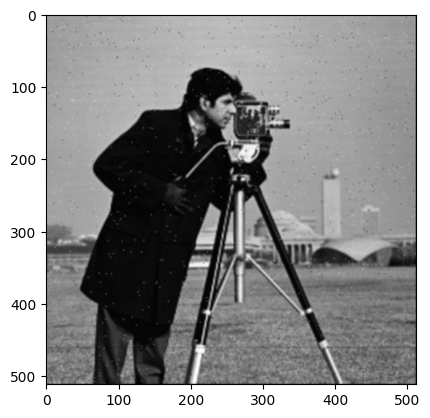

In [ ]:
image=mpimg.imread(dropdown.value)
plt.imshow(image,cmap='gray')
plt.show()

In [ ]:
x=enhancement(filter.value,filter_size.value,image)
# plt.imsave('blurred.jpg',x,cmap='gray')
plt.imshow(x,cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

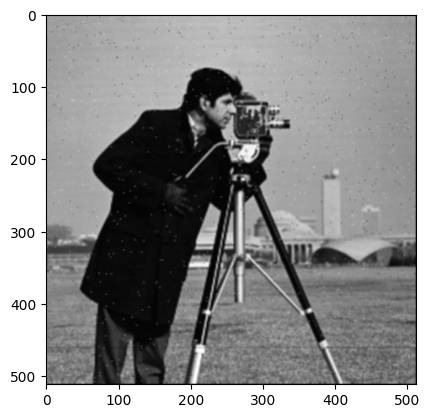

In [ ]:
x = np.clip(x, 0, 255)
plt.imshow(x,cmap='gray')
plt.show